<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Garbage-Classifier-ml-code/blob/main/Qunatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pickle

In [3]:
# load model from pickle file
model_pkl_file = "garbage_classifier_model.pkl"
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

In [4]:
model.save("./saved_model")

In [5]:
from keras.models import load_model
model_final = load_model('./saved_model')

In [6]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")

In [7]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [8]:
!pip install tflite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 2.5 MB/s eta 0:00:00


In [9]:
import tensorflow as tf
def quantize_model(model):
    # Convert the model to a quantized version
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    quantized_model = converter.convert()

    return quantized_model

In [10]:
quantized_model = quantize_model(model)

In [11]:
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_model)

In [12]:
from PIL import Image

# Open the image file
image = Image.open('/content/plastic125.jpg')

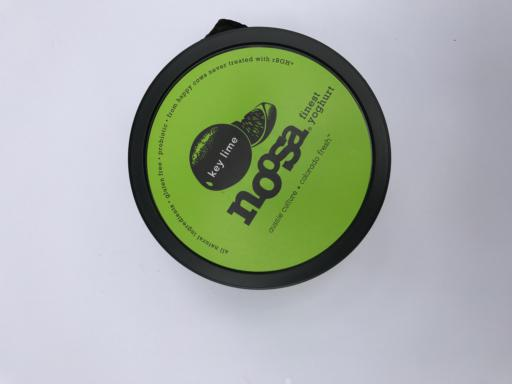

In [13]:
image

In [14]:
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)
resized_image=resize_image(image)

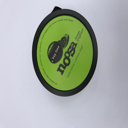

In [15]:
resized_image

In [16]:
import numpy as np
a = np.array(image)

In [17]:
np.array(image)

array([[[219, 219, 231],
        [219, 219, 231],
        [219, 219, 231],
        ...,
        [172, 172, 184],
        [172, 172, 184],
        [172, 172, 184]],

       [[219, 219, 231],
        [219, 219, 231],
        [219, 219, 231],
        ...,
        [172, 172, 184],
        [172, 172, 184],
        [172, 172, 184]],

       [[219, 219, 231],
        [219, 219, 231],
        [219, 219, 231],
        ...,
        [172, 172, 184],
        [172, 172, 184],
        [172, 172, 184]],

       ...,

       [[217, 216, 230],
        [216, 215, 229],
        [216, 215, 229],
        ...,
        [177, 177, 187],
        [177, 177, 187],
        [177, 177, 187]],

       [[217, 216, 230],
        [217, 216, 230],
        [216, 215, 229],
        ...,
        [177, 177, 187],
        [177, 177, 187],
        [177, 177, 187]],

       [[217, 216, 230],
        [217, 216, 230],
        [217, 216, 230],
        ...,
        [177, 177, 187],
        [177, 177, 187],
        [177, 177, 187]]

In [18]:
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

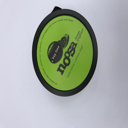

In [19]:
resize_image=resize_image(image)
resize_image

In [20]:
List = ["battery",'biological','brown-glass','cardboard','clothes','green-glass','metal','paper','plastic','shoes','trash','white-glass',]

In [21]:
import numpy as np
import cv2

def resize_and_convert(input_array):
    resized_array = cv2.resize(input_array, (224, 224))

    expanded_array = np.expand_dims(resized_array, axis=0)

    return expanded_array
r_image = resize_and_convert(np.array(resized_image))

In [22]:
r_image

array([[[[219, 219, 231],
         [219, 219, 231],
         [219, 219, 231],
         ...,
         [174, 174, 186],
         [173, 173, 185],
         [172, 172, 184]],

        [[219, 219, 231],
         [219, 219, 231],
         [219, 219, 231],
         ...,
         [174, 174, 186],
         [173, 173, 185],
         [172, 172, 184]],

        [[219, 219, 231],
         [219, 219, 231],
         [219, 219, 231],
         ...,
         [174, 174, 186],
         [173, 173, 185],
         [172, 172, 184]],

        ...,

        [[215, 214, 228],
         [215, 214, 228],
         [214, 213, 227],
         ...,
         [179, 179, 189],
         [178, 178, 188],
         [177, 177, 187]],

        [[215, 215, 229],
         [215, 214, 228],
         [215, 214, 228],
         ...,
         [179, 179, 189],
         [178, 178, 188],
         [177, 177, 187]],

        [[216, 215, 229],
         [215, 215, 229],
         [215, 214, 228],
         ...,
         [179, 179, 189],
        

In [23]:
import tensorflow as tf
import numpy as np

# Load the quantized model
interpreter = tf.lite.Interpreter(model_path='quantized_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Assuming a single input tensor
input_tensor_index = input_details[0]['index']
input_tensor_shape = input_details[0]['shape']

# Load your test data
test_data = r_image

# Preprocess the input data to match the model's requirements
# Modify this based on your specific preprocessing steps for the original model
normalized_data = test_data.astype(np.float32)

# Ensure the input shape matches the model's expected input shape
assert normalized_data.shape == tuple(input_tensor_shape), "Input shape mismatch"

# Set the input tensor
interpreter.set_tensor(input_tensor_index, normalized_data)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Output the predictions
predicted_class = np.argmax(output_data)
print(List[predicted_class])

plastic


In [24]:
predictions = model_final.predict(r_image)

predicted_class = np.argmax(predictions[0])

print(List[predicted_class])

1/1 [==============================] - 2s 2s/step
plastic
